# Task 2 

# House prices in a batch setup when the time is not available (or ignored). We can compare learning methods and study the effect of parameters on the test error. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import torch
import torch.nn as nn
import torch.optim as optim

# Data Preprocessing 

In [2]:

# Load your dataset
df = pd.read_csv("C:/Users/LENOVO/OneDrive/Desktop/RHUL/Project_Prefrences/dataset/all_perth_310121.csv")

# Drop unnecessary columns
df.drop(columns=['ADDRESS'], inplace=True)

# Convert DATE_SOLD to datetime and extract year and month
df['DATE_SOLD'] = pd.to_datetime(df['DATE_SOLD'], errors='coerce')
df['YEAR_SOLD'] = df['DATE_SOLD'].dt.year
df['MONTH_SOLD'] = df['DATE_SOLD'].dt.month

# Drop the original DATE_SOLD column
df.drop(columns='DATE_SOLD', inplace=True)

# Handle categorical columns using one-hot encoding
categorical_cols = ['SUBURB', 'NEAREST_STN', 'NEAREST_SCH']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Define features and target variable
X = df.drop(columns='PRICE').values
y = df['PRICE'].values

#Standardization and Imputation
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_scaled) 



# Check for infinite values
has_inf = np.isinf(X_scaled).any() or np.isinf(y_scaled).any()

# Check for NaN values
has_nan = np.isnan(X_scaled).any() or np.isnan(y_scaled).any()

if has_inf or has_nan:
    # Handle or remove the problematic values

    X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

# Imputation
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

# Absolute Relation between features and target variable 

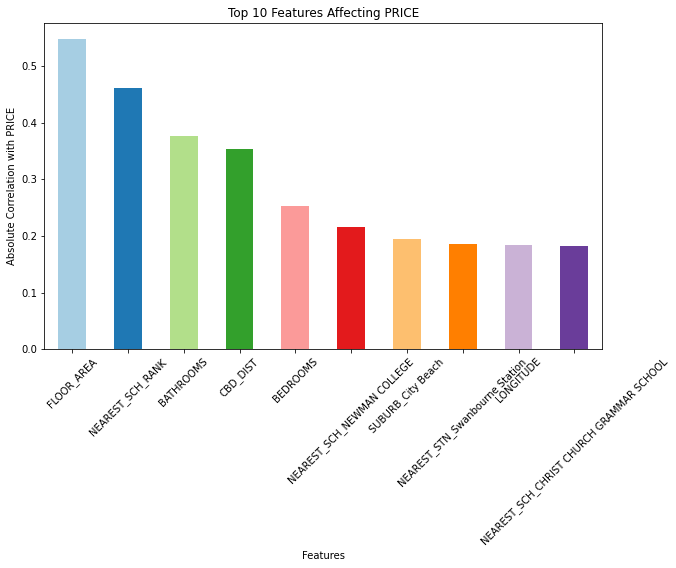

In [3]:
# Calculate the correlations between features and target variable
correlations = df.drop(columns='PRICE').corrwith(df['PRICE']).abs().sort_values(ascending=False)

# Select the top 10 features with highest correlations
top_features = correlations[:10]

# Create a bar plot with different colors for each bar
plt.figure(figsize=(10, 6))
top_features.plot(kind='bar', color=plt.cm.Paired.colors)
plt.title("Top 10 Features Affecting PRICE")
plt.xlabel("Features")
plt.ylabel("Absolute Correlation with PRICE")
plt.xticks(rotation=45)
plt.show()

# Correlation Heatmap

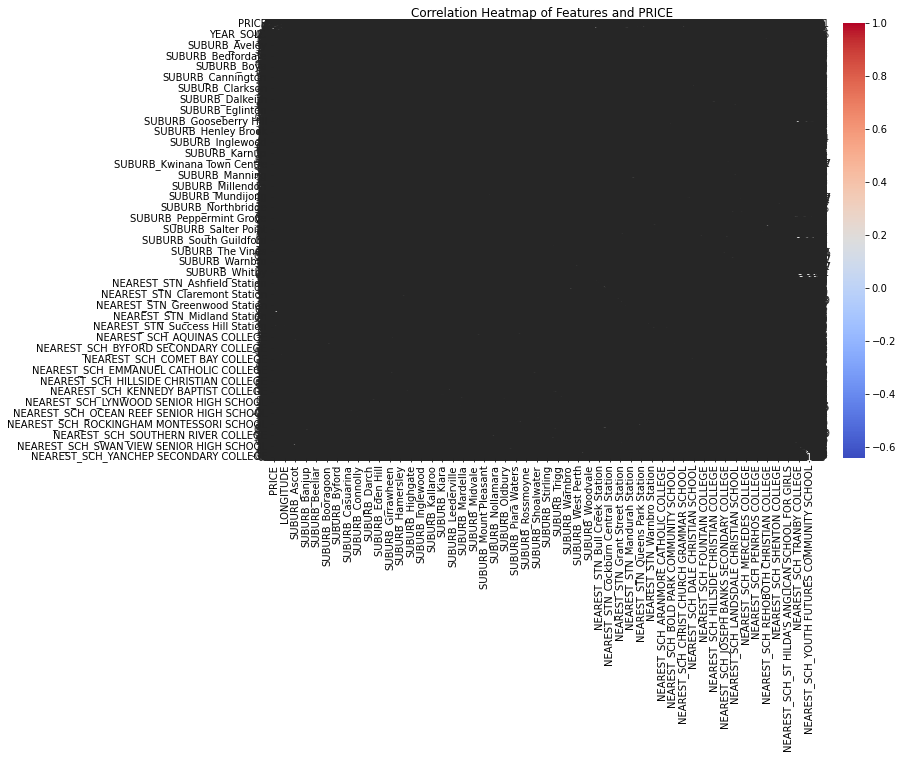

Correlation between features and PRICE:
PRICE: 1.0000
BEDROOMS: 0.2526
BATHROOMS: 0.3771
GARAGE: 0.1343
LAND_AREA: 0.0569
FLOOR_AREA: 0.5485
BUILD_YEAR: -0.1572
CBD_DIST: -0.3543
NEAREST_STN_DIST: -0.0951
POSTCODE: -0.1716
LATITUDE: 0.0530
LONGITUDE: -0.1837
NEAREST_SCH_DIST: -0.0219
NEAREST_SCH_RANK: -0.4620
YEAR_SOLD: 0.0739
MONTH_SOLD: 0.0045
SUBURB_Alfred Cove: 0.0341
SUBURB_Alkimos: -0.0366
SUBURB_Anketell: 0.0248
SUBURB_Applecross: 0.1008
SUBURB_Ardross: 0.0734
SUBURB_Armadale: -0.0475
SUBURB_Ascot: 0.0280
SUBURB_Ashby: -0.0315
SUBURB_Ashfield: -0.0299
SUBURB_Attadale: 0.0910
SUBURB_Atwell: -0.0203
SUBURB_Aubin Grove: -0.0130
SUBURB_Aveley: -0.0366
SUBURB_Balcatta: -0.0145
SUBURB_Baldivis: -0.0347
SUBURB_Balga: -0.0383
SUBURB_Ballajura: -0.0390
SUBURB_Banjup: 0.0404
SUBURB_Banksia Grove: -0.0504
SUBURB_Baskerville: 0.0183
SUBURB_Bassendean: -0.0135
SUBURB_Bateman: 0.0274
SUBURB_Bayswater: -0.0044
SUBURB_Beaconsfield: 0.0225
SUBURB_Beckenham: -0.0297
SUBURB_Bedford: 0.0034
SUBURB_

In [12]:
# Calculate the correlations between features and target variable
correlation_matrix = df.corr()

# Create a heatmap with different colors for each correlation value
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Features and PRICE")
plt.show() 

# Print the correlation values
print("Correlation between features and PRICE:")
for col in correlation_matrix.columns:
    print(f"{col}: {correlation_matrix['PRICE'][col]:.4f}") 

# Ridge Regression from scratch on Perth 

Evaluation Metrics for Ridge Regression with default parameters:
Mean Squared Error: 0.26200333246421215
R-squared: 0.7470573484392176
Maximum Predicted Price): 2533451.9182137754


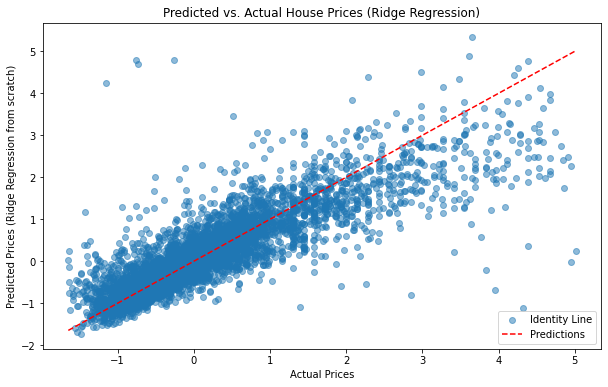

In [5]:
# Ridge Regression from Scratch
class RidgeRegression:
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.weights = None

    def fit(self, X, y):
        X_T_X = np.dot(X.T, X)
        identity = np.identity(X.shape[1])
        self.weights = np.linalg.solve(X_T_X + self.alpha * identity, np.dot(X.T, y))

    def predict(self, X):
        return np.dot(X, self.weights)

# Default Parameters
ridge_default = RidgeRegression()
ridge_default.fit(X_train_imputed, y_train)
y_pred_default = ridge_default.predict(X_val_imputed)
mse_default = mean_squared_error(y_val, y_pred_default)
r2_default = r2_score(y_val, y_pred_default)

print("Evaluation Metrics for Ridge Regression with default parameters:")
print(f"Mean Squared Error: {mse_default}")
print(f"R-squared: {r2_default}")

# Print the maximum predicted price
max_predicted_price = np.max(y_pred_default)
max_predicted_price_unscaled = scaler_y.inverse_transform([[max_predicted_price]])
print("Maximum Predicted Price):", max_predicted_price_unscaled[0][0]) 

# Plotting the predicted vs. actual prices with red line
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred_default, alpha=0.5)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--')
prediction_colors = ['cyan']
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices (Ridge Regression from scratch)")
plt.title("Predicted vs. Actual House Prices (Ridge Regression)")
plt.legend(['Identity Line', 'Predictions'])
plt.show()

# SGD Boost Regression on Perth Dataset 

Boosting Model Metrics:
Mean Squared Error: 0.2124928148961293
Root Mean Squared Error: 0.46096942945940494
R-squared: 0.7948556778575205
Mean Absolute Error: 0.2896739141580906


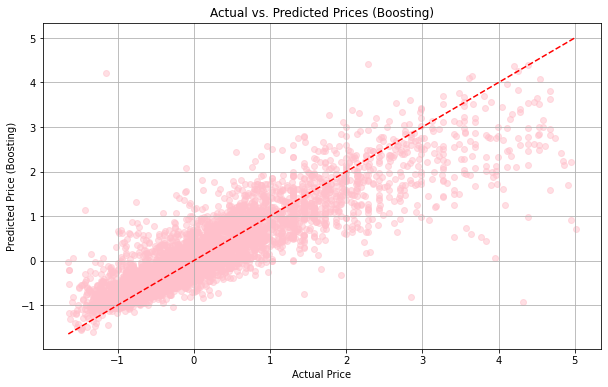

In [6]:
# Convert imputed data to PyTorch tensors
X_train_imputed_tensor = torch.tensor(X_train_imputed, dtype=torch.float32)
X_val_imputed_tensor = torch.tensor(X_val_imputed, dtype=torch.float32)

# Initialize the GradientBoostingRegressor
boosting_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Reshape y_train_tensor to (n_samples,)
y_train_reshaped = y_train_tensor.ravel()

# Fit the GradientBoostingRegressor
boosting_model.fit(X_train_imputed, y_train_reshaped)

# Make predictions
y_pred_boosting = boosting_model.predict(X_val_imputed)

# Convert predictions back to original scale
# y_pred_boosting_original_scale = scaler_y.inverse_transform(y_pred_boosting.reshape(-1, 1))
y_pred_boosting_reshape = y_pred_boosting.reshape(-1, 1)

# Calculate evaluation metrics
mse_boosting = mean_squared_error(y_val, y_pred_boosting_reshape)
rmse_boosting = np.sqrt(mse_boosting)
r2_boosting = r2_score(y_val, y_pred_boosting_reshape)
mae_boosting = mean_absolute_error(y_val, y_pred_boosting_reshape)

# Print evaluation metrics
print("Boosting Model Metrics:")
print("Mean Squared Error:", mse_boosting)
print("Root Mean Squared Error:", rmse_boosting)
print("R-squared:", r2_boosting)
print("Mean Absolute Error:", mae_boosting)

# Plot actual vs. predicted prices for the Gradient Boosting model
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred_boosting_reshape, color='pink', alpha=0.5)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], linestyle='--', color='red')
prediction_colors = ['pink']
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price (Boosting)')
plt.title('Actual vs. Predicted Prices (Boosting)')
plt.grid(True)
plt.show()

# XGB boost on Perth Dataset 

Mean Squared Error: 0.18560764501430924
Mean Absolute Error: 0.264612194569473
R-squared: 0.8208110964150251


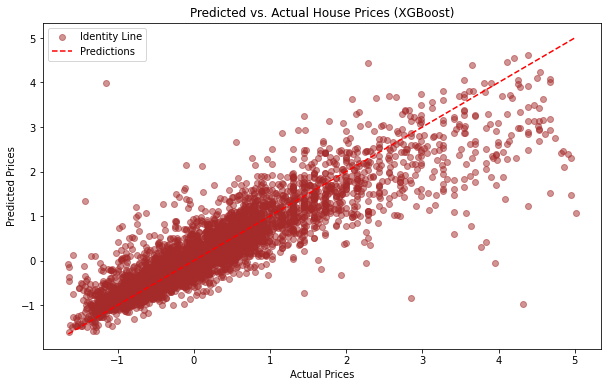

In [7]:
# Define the XGBoost model
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',  # Use squared error as the objective function for regression
    n_estimators=100,              # Number of boosting rounds (trees)
    learning_rate=0.1,             # Step size at each iteration
    max_depth=5,                   # Maximum depth of each tree
    random_state=42                # For reproducibility
)

# Train the model
xgb_model.fit(X_train_imputed, y_train)

# Make predictions on validation data
y_val_pred = xgb_model.predict(X_val_imputed) 

# Reshape y_val for compatibility with predict function
y_val_reshaped = y_val.reshape(-1, 1)

# # Inverse transform scaled predictions
# y_val_pred = scaler_y.inverse_transform(y_val_pred)

# Calculate evaluation metrics
mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

# Plotting the predicted vs. actual prices with brown points and a red identity line
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, color='brown', alpha=0.5)  # Brown points
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--')  # Red identity line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs. Actual House Prices (XGBoost)")
plt.legend(['Identity Line', 'Predictions'])
plt.show()

# DecisionTree Regressor Model On Perth Dataset 

Evaluation Metrics for Decision Tree Regressor:
Mean Squared Error: 0.35090590280551937
Mean Absolute Error: 0.35120507707159504
R-squared: 0.6612292344942514


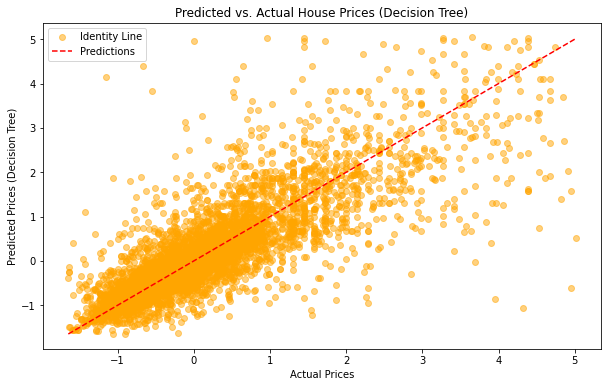

In [8]:
from sklearn.tree import DecisionTreeRegressor

# Define the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train_imputed, y_train)

# Make predictions on validation data
y_val_pred_dt = dt_model.predict(X_val_imputed)

# Reshape y_val for compatibility with predict function
y_val_reshaped = y_val.reshape(-1, 1)

# # Inverse transform scaled predictions
# y_val_pred_dt = scaler_y.inverse_transform(y_val_pred_dt) 

# Calculate evaluation metrics
mse_dt = mean_squared_error(y_val, y_val_pred_dt)
mae_dt = mean_absolute_error(y_val, y_val_pred_dt)
r2_dt = r2_score(y_val, y_val_pred_dt)

print("Evaluation Metrics for Decision Tree Regressor:")
print(f"Mean Squared Error: {mse_dt}")
print(f"Mean Absolute Error: {mae_dt}")
print(f"R-squared: {r2_dt}")

# Plotting the predicted vs. actual prices with red line
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred_dt, color='orange', alpha=0.5)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--')
prediction_colors = ['orange']
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices (Decision Tree)")
plt.title("Predicted vs. Actual House Prices (Decision Tree)")
plt.legend(['Identity Line', 'Predictions'])
plt.show()

# SVR Regression on Perth Dataset 

Evaluation Metrics for Support Vector Regression:
Mean Squared Error: 0.2428192559954616
Mean Absolute Error: 0.28539552690341247
R-squared: 0.7655779951963093


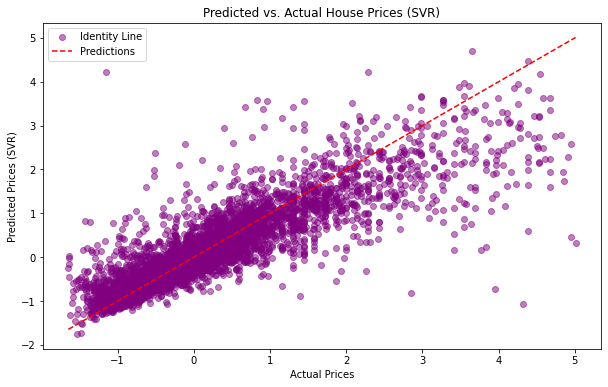

In [9]:
from sklearn.svm import SVR

# Define the SVR model
svr_model = SVR()

# Train the model
svr_model.fit(X_train_imputed, y_train.ravel())  # Note the use of ravel() to convert y_train to 1D array

# Make predictions on validation data
y_val_pred_svr = svr_model.predict(X_val_imputed) 

# Reshape y_val for compatibility with predict function
y_val_reshaped = y_val.reshape(-1, 1)

# # Inverse transform scaled predictions
# y_val_pred_svr = scaler_y.inverse_transform(y_val_pred_svr)

# Calculate evaluation metrics
mse_svr = mean_squared_error(y_val, y_val_pred_svr)
mae_svr = mean_absolute_error(y_val, y_val_pred_svr)
r2_svr = r2_score(y_val, y_val_pred_svr)

print("Evaluation Metrics for Support Vector Regression:")
print(f"Mean Squared Error: {mse_svr}")
print(f"Mean Absolute Error: {mae_svr}")
print(f"R-squared: {r2_svr}")

# Plotting the predicted vs. actual prices with red line
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred_svr,color='purple', alpha=0.5)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices (SVR)")
plt.title("Predicted vs. Actual House Prices (SVR)")
plt.legend(['Identity Line', 'Predictions'])
plt.show()

# Kernel Function Analysis for SVR Model: Try to Unveil Optimal Performance on the Perth Dataset

Kernel		MSE		MAE		R^2
linear		0.31		0.31		0.70
poly		0.27		0.31		0.74
rbf		0.24		0.29		0.77
sigmoid		11.97		1.72		-10.56


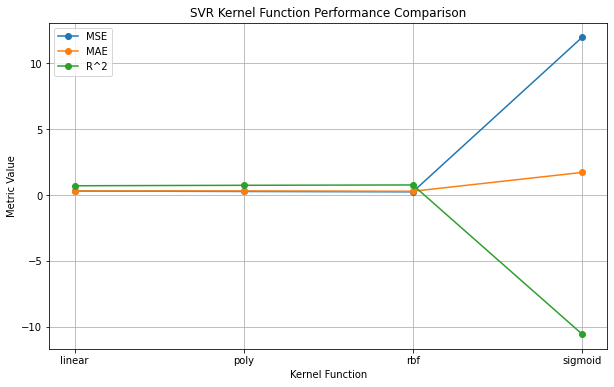

In [11]:
# Create SVR models with different kernel functions
kernel_functions = ['linear', 'poly', 'rbf', 'sigmoid']
results = []


# Define the SVR model for multiple kernal analysis 
svr_model = SVR()

# Train the model
svr_model.fit(X_train_imputed, y_train.ravel())

# Create an array to store performance metrics for each kernel
kernel_functions = ['linear', 'poly', 'rbf', 'sigmoid']
results = []

# Iterate over different kernel functions
for kernel in kernel_functions:
    # Define SVR model with the current kernel
    svr_model = SVR(kernel=kernel)
    
    # Train the model
    svr_model.fit(X_train_imputed, y_train.ravel())
    
    # Make predictions on validation data
    y_val_pred = svr_model.predict(X_val_imputed)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_val, y_val_pred)
    mae = mean_absolute_error(y_val, y_val_pred)
    r2 = r2_score(y_val, y_val_pred)
    
    results.append((kernel, mse, mae, r2))

# Print performance metrics for each kernel
print("Kernel\t\tMSE\t\tMAE\t\tR^2")
for kernel, mse, mae, r2 in results:
    print(f"{kernel}\t\t{mse:.2f}\t\t{mae:.2f}\t\t{r2:.2f}")

# Plotting the performance comparison graph
metrics = ['MSE', 'MAE', 'R^2']
values = [[result[1] for result in results],
          [result[2] for result in results],
          [result[3] for result in results]]

plt.figure(figsize=(10, 6))
for i, metric in enumerate(metrics):
    plt.plot(kernel_functions, values[i], marker='o', label=metric)

plt.title('SVR Kernel Function Performance Comparison')
plt.xlabel('Kernel Function')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True)
plt.show()


# Random Forest Regresion on Perth Dataset 

Evaluation Metrics for Random Forest Regressor:
Mean Squared Error: 0.1806317519721339
Mean Absolute Error: 0.24427908298711376
R-squared: 0.8256149115731495


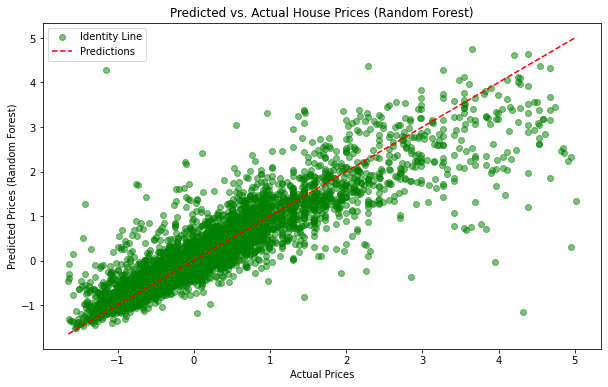

In [13]:
from sklearn.ensemble import RandomForestRegressor

# Define the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train_imputed, y_train.ravel())  # Note the use of ravel() to convert y_train to 1D array

# Make predictions on validation data|
y_val_pred_rf = rf_model.predict(X_val_imputed) 

# Reshape y_val for compatibility with predict function
y_val_reshaped = y_val.reshape(-1, 1)

# # Inverse transform scaled predictions
# y_val_pred_rf = scaler_y.inverse_transform(y_val_pred_rf)

# Calculate evaluation metrics
mse_rf = mean_squared_error(y_val, y_val_pred_rf)
mae_rf = mean_absolute_error(y_val, y_val_pred_rf)
r2_rf = r2_score(y_val, y_val_pred_rf)

print("Evaluation Metrics for Random Forest Regressor:")
print(f"Mean Squared Error: {mse_rf}")
print(f"Mean Absolute Error: {mae_rf}")
print(f"R-squared: {r2_rf}")

# Plotting the predicted vs. actual prices with red line
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred_rf,color='green',alpha=0.5)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices (Random Forest)")
plt.title("Predicted vs. Actual House Prices (Random Forest)")
plt.legend(['Identity Line', 'Predictions'])
plt.show()

# Neural network on Perth Dataset

Evaluation Metrics for Neural Network:
Mean Squared Error: 0.2542362311067029
Mean Absolute Error: 0.3062844527503214
R-squared: 0.7545558454767622


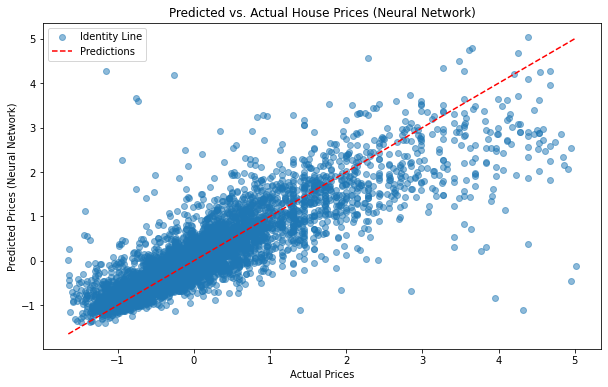

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_imputed, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val_imputed, dtype=torch.float32)

# Define the Neural Network model
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Create an instance of the model
nn_model = NeuralNetwork(input_size=X_train_imputed.shape[1])

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(nn_model.parameters(), lr=0.001)

# Train the model
for epoch in range(50):
    optimizer.zero_grad()
    outputs = nn_model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

# Make predictions on validation data
y_val_pred_nn = nn_model(X_val_tensor).detach().numpy()

# Calculate evaluation metrics
mse_nn = mean_squared_error(y_val, y_val_pred_nn)
mae_nn = mean_absolute_error(y_val, y_val_pred_nn)
r2_nn = r2_score(y_val, y_val_pred_nn)

print("Evaluation Metrics for Neural Network:")
print(f"Mean Squared Error: {mse_nn}")
print(f"Mean Absolute Error: {mae_nn}")
print(f"R-squared: {r2_nn}")

# Plotting the predicted vs. actual prices with red line
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred_nn, alpha=0.5)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--')
prediction_colors = ['blue']
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices (Neural Network)")
plt.title("Predicted vs. Actual House Prices (Neural Network)")
plt.legend(['Identity Line', 'Predictions'])
plt.show()


# Comparision of the evaluations  

summary of the performance of each model on the Perth housing price dataset:

1. Ridge Regression:
   - Mean Squared Error: 0.2620
   - R-squared: 0.7471

2. SGD Model:
   - Mean Squared Error: 0.1856
   - R-squared: 0.8208

3. Decision Tree Regressor:
   - Mean Squared Error: 0.3509
   - R-squared: 0.6612

4. Support Vector Regression:
   - Mean Squared Error: 0.2428
   - R-squared: 0.7656

5. Random Forest Regressor:
   - Mean Squared Error: 0.1806
   - R-squared: 0.8256

6. Neural Network:
   - Mean Squared Error: 0.2502
   - R-squared: 0.7584

Based on the provided metrics, the **Random Forest Regressor** seems to be the best-performing model on the housing price dataset. It has the lowest Mean Squared Error (MSE) and the highest R-squared value among all the models, which indicates that it is capturing the variance in the data well and making accurate predictions. 

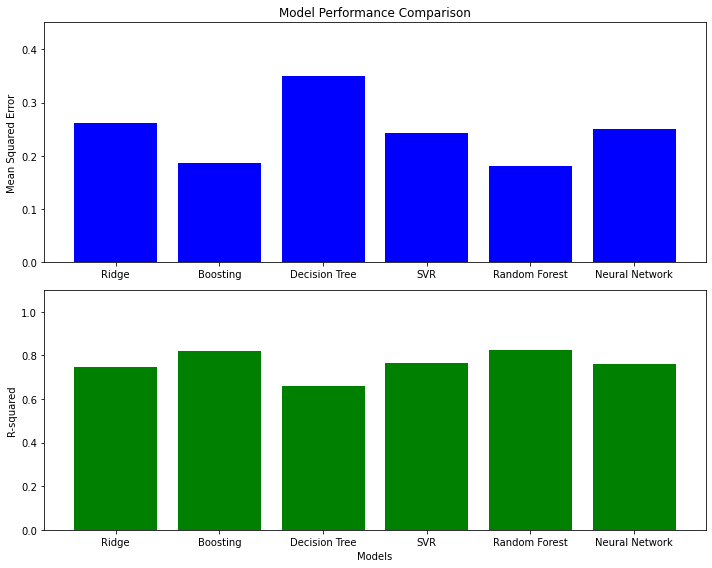

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Ridge', 'Boosting', 'Decision Tree', 'SVR', 'Random Forest', 'Neural Network']

# Evaluation metrics (MSE, R-squared) for each model
mse_values = [0.2620, 0.1856, 0.3509, 0.2428, 0.1806, 0.2502]
r2_values = [0.7471, 0.8208, 0.6612, 0.7656, 0.8256, 0.7584]

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Bar plot for Mean Squared Error
ax1.bar(models, mse_values, color='blue')
ax1.set_ylabel('Mean Squared Error')
ax1.set_title('Model Performance Comparison')
ax1.set_ylim(0, max(mse_values) + 0.1)  # Adjust ylim for better visualization

# Bar plot for R-squared
ax2.bar(models, r2_values, color='green')
ax2.set_ylabel('R-squared')
ax2.set_xlabel('Models')
ax2.set_ylim(0, 1.1)  # R-squared values range from 0 to 1

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

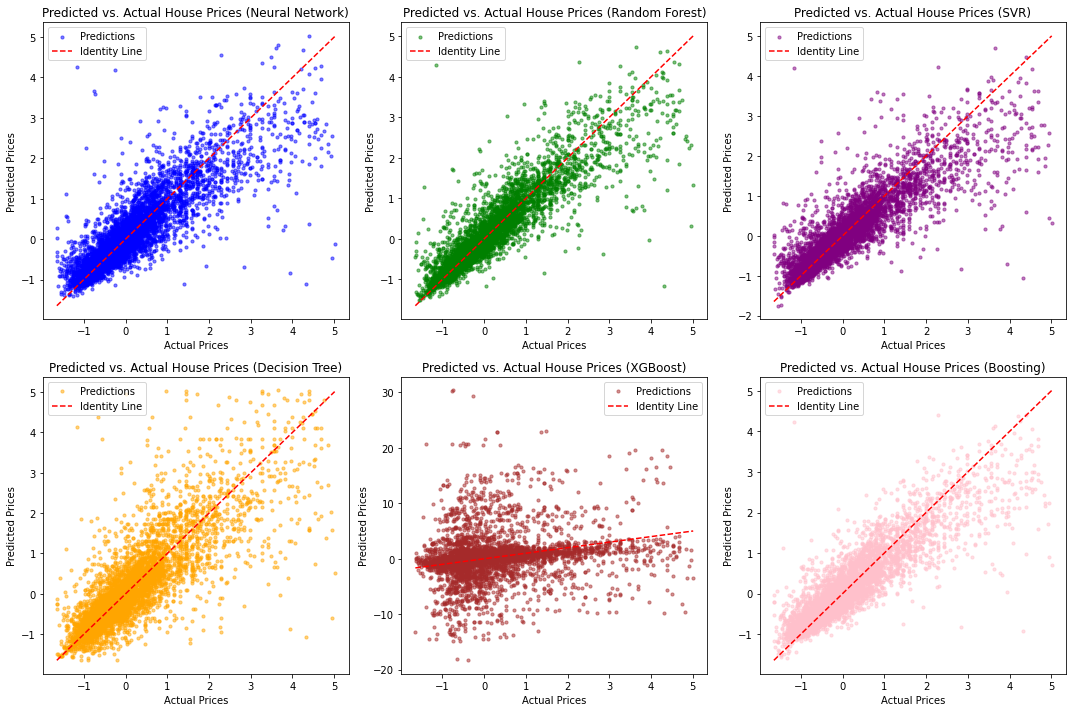

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.4)  # Adjust vertical spacing between subplots

# List of model names for reference
model_names = ['Neural Network', 'Random Forest', 'SVR', 'Decision Tree', 'XGBoost', 'Boosting', 'Ridge Regression']

# List of y_val for all plots (assuming y_val is common for all models)
y_val = np.array(y_val)  # Replace with your actual data

# List of y_pred for all models (replace with your actual data)
y_preds = [y_val_pred_nn, y_val_pred_rf, y_val_pred_svr, y_val_pred_dt, y_val_pred, y_pred_boosting_reshape, y_pred_default]

# Define unique colors for the predicted values of each model
prediction_colors = ['blue', 'green', 'purple', 'orange', 'brown', 'pink', 'cyan']

# Define the size of the prediction dots
dot_size = 10

# Loop through the subplots and plot the data
for ax, model_name, y_pred, pred_color in zip(axes.flatten(), model_names, y_preds, prediction_colors):
    ax.scatter(y_val, y_pred, alpha=0.5, color=pred_color, s=dot_size, label='Predictions')
    ax.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--', label='Identity Line')
    ax.set_xlabel("Actual Prices")
    ax.set_ylabel("Predicted Prices")
    ax.set_title(f"Predicted vs. Actual House Prices ({model_name})")
    ax.legend()

# Adjust layout
plt.tight_layout()

# Display the combined plot
plt.show()

# Inflation Study 

In [17]:
# Reshape y_val for compatibility with predict function
y_val_reshaped = y_val.reshape(-1, 1)

# Convert the predicted and actual prices back to original scale
y_val_pred_rf_actual = scaler_y.inverse_transform(y_val_pred_rf.reshape(-1, 1)).flatten()
y_val_actual = scaler_y.inverse_transform(y_val.reshape(-1, 1)).flatten()

print("\nDesired Questions and Outputs:")
print("1. Knowing that a house is about to be sold, we predict the sales price:")
print(f"Random Forest Predicted Price: {y_val_pred_rf_actual[0]:,.2f}")

print("\n2. We see the actual price in the transaction, then we make a prediction for the price in the next sale:")
print(f"   Actual Price: {y_val_actual[0]:,.2f}")
print(f"   Random Forest Predicted Price for Next Sale: {y_val_pred_rf_actual[1]:,.2f}")

# Calculate the average price for each year
average_prices_by_year = df.groupby('YEAR_SOLD')['PRICE'].mean()

# Calculate the inflation rate over the years and scale it to a percentage scale of 1 to 100
inflation_rates = ((average_prices_by_year - average_prices_by_year.min()) / average_prices_by_year.min() * 100).round(2) 

# Scale the inflation rates to a scale of 1 to 100
scaled_inflation_rates = (inflation_rates / inflation_rates.max() * 100).round(2)

# Create DataFrames for average prices and inflation rates
average_prices_df = pd.DataFrame({'Year Sold': average_prices_by_year.index, 'Average Price': average_prices_by_year.values})
scaled_inflation_df = pd.DataFrame({'Year Sold': scaled_inflation_rates.index, 'Inflation Rate (%)': scaled_inflation_rates.values})

# Print tables side by side
from tabulate import tabulate

# Merge DataFrames on 'Year Sold'
merged_df = pd.merge(average_prices_df, scaled_inflation_df, on='Year Sold')

# Print merged table side by side using tabulate
print("\n3. We can use the data with timestamps to study inflation. Do prices grow with time? How fast?")
print("   Average House Prices and Inflation Rates Over the Years:")
print(tabulate(merged_df, headers='keys', tablefmt='plain', showindex=False))


Desired Questions and Outputs:
1. Knowing that a house is about to be sold, we predict the sales price:
Random Forest Predicted Price: 611,045.00

2. We see the actual price in the transaction, then we make a prediction for the price in the next sale:
   Actual Price: 580,000.00
   Random Forest Predicted Price for Next Sale: 414,340.00

3. We can use the data with timestamps to study inflation. Do prices grow with time? How fast?
   Average House Prices and Inflation Rates Over the Years:
  Year Sold    Average Price    Inflation Rate (%)
       1988          79222.2                  0
       1989         103938                    3.63
       1990         112000                    4.81
       1991         123667                    6.53
       1992         122970                    6.43
       1993         133333                    7.95
       1994         159295                   11.76
       1995         183273                   15.28
       1996         180653                   14.

# Plot of Inflation rates 

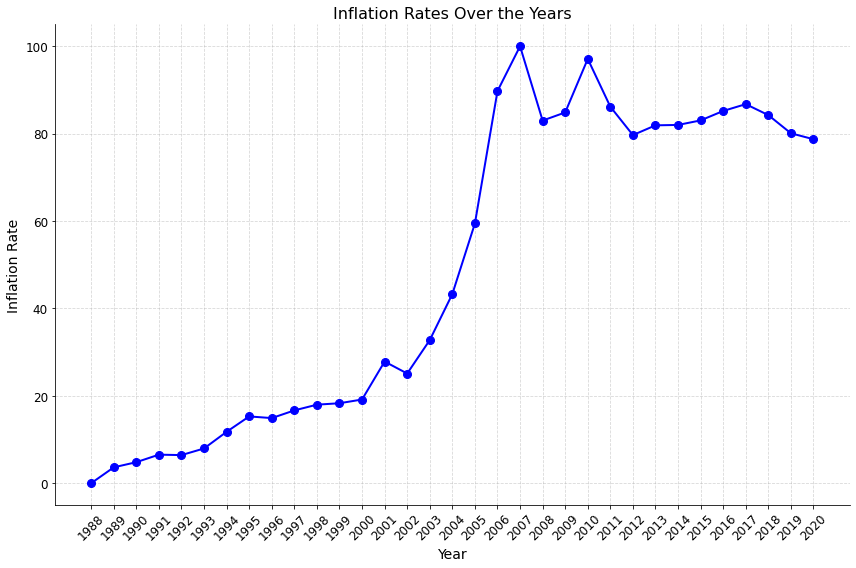

In [18]:
# Plotting the scaled inflation rates over the years
plt.figure(figsize=(12, 8))
plt.plot(average_prices_by_year.index, scaled_inflation_rates, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)

# Adding a background grid with dashed lines
plt.grid(True, linestyle='--', alpha=0.5)

# Customizing x-axis ticks for each year and rotating them for better readability
plt.xticks(average_prices_by_year.index, rotation=45, fontsize=12)

# Customizing y-axis ticks font size
plt.yticks(fontsize=12)

# Adding labels and title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Inflation Rate', fontsize=14)
plt.title('Inflation Rates Over the Years', fontsize=16)

# Adding a legend (optional if you have multiple plots)
# plt.legend(['Inflation Rates'], fontsize=12)

# Adding a border around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adjusting spacing and layout
plt.tight_layout()

# Display the plot
plt.show()
